In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [3]:
proj_dir = '/content/drive/MyDrive/3_Research_Related/ADHD_Research_Google_Colab'

read_dir_adhd = proj_dir+ '/DATA/3_PREPROCESSED/ADHD_preprocessed'
corr_dir_adhd   = proj_dir + '/DATA/CORR_TABLE/corr_adhd.npy'
corr_dir_adhd_overlap   = proj_dir + 'DATA/CORR_TABLE/corr_adhd_overlap.npy'

read_dir_control = proj_dir+ '/DATA/3_PREPROCESSED/CONTROL_preprocessed'
corr_dir_control = proj_dir + '/DATA/CORR_TABLE/corr_control.npy'
corr_dir_control_overlap   = proj_dir + 'DATA/CORR_TABLE/corr_control_overlap.npy'

# Pearson Correlation - 20 channels
## Stack by epoch (same as MI)

In [4]:
# create ADHD dataset with correct dimension
list_of_ADHD = []
total_epoch = 0
for i in os.listdir(read_dir_adhd): # for each file (patients)
    df = pd.read_csv(read_dir_adhd+"/"+i)
    arr = df.to_numpy()
    num_epoch = arr.shape[0] / 512 # 512 data points in 1 epoch (4 sec x 128 hz)

    list_of_epoch = []
    #print(num_epoch)
    total_epoch += num_epoch
    for i in range(int(num_epoch)):
        single_epoch = arr[ i*512 : (i+1)*512 , 1: ].transpose() # slice for each epoch. shape: (channel, time)
        list_of_epoch.append(single_epoch)
    list_of_ADHD.append(list_of_epoch)
all_epoch = []
for patient in list_of_ADHD:
    for epoch in patient:
        all_epoch.append(epoch)
ADHD_dataset = np.stack(all_epoch)

print('Total Epoch: ',total_epoch)
print('ADHD dataset dimension: ',ADHD_dataset.shape, '(epoch, channel, time)')

# create CONTROL dataset with correct dimension
list_of_CONTROL = []
total_epoch = 0
for i in os.listdir(read_dir_control): # for each file (patients)
    df = pd.read_csv(read_dir_control+"/"+i)
    arr = df.to_numpy()
    num_epoch = arr.shape[0] / 512 # 512 data points in 1 epoch (4 sec x 128 hz)

    #if num_epoch < 21: # skip patients with less than 21 epochs
     #   continue
    #num_epoch = 21
    list_of_epoch = []
    #print(num_epoch)
    total_epoch += num_epoch
    for i in range(int(num_epoch)):
        single_epoch = arr[ i*512 : (i+1)*512 , 1: ].transpose() # slice for each epoch. shape: (channel, time)
        list_of_epoch.append(single_epoch)
    list_of_CONTROL.append(list_of_epoch)

all_epoch = []
for patient in list_of_CONTROL:
    for epoch in patient:
        all_epoch.append(epoch)

CONTROL_dataset = np.stack(all_epoch)

print('Total Epoch: ',total_epoch)
print('CONTROL dataset dimension: ',CONTROL_dataset.shape, '(epoch, channel, time)')


Total Epoch:  2231.0
ADHD dataset dimension:  (2231, 20, 512) (epoch, channel, time)
Total Epoch:  1757.0
CONTROL dataset dimension:  (1757, 20, 512) (epoch, channel, time)


## Create Corr table

In [ ]:
# create Pearson Correlation table for ADHD
(epochs, channels, frames) = ADHD_dataset.shape
corr_table = np.zeros([epochs, channels, channels])
for j in range(epochs):
    if j%100==0: 
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("ADHD", j, current_time)
    epoch = ADHD_dataset[j,:,:]
    for k in range(channels):
        for l in range(channels):
            (r, p) = pearsonr(epoch[k,:], epoch[l,:])
            if k==l:
                corr_table[j,k,l] = 0
            else:
                corr_table[j,k,l] = r

np.save(corr_dir_adhd, corr_table)

ADHD 0 09:54:31
ADHD 100 09:54:34
ADHD 200 09:54:36
ADHD 300 09:54:39
ADHD 400 09:54:41
ADHD 500 09:54:44
ADHD 600 09:54:46
ADHD 700 09:54:48
ADHD 800 09:54:51
ADHD 900 09:54:53
ADHD 1000 09:54:56
ADHD 1100 09:54:58
ADHD 1200 09:55:01
ADHD 1300 09:55:03
ADHD 1400 09:55:05
ADHD 1500 09:55:08
ADHD 1600 09:55:10
ADHD 1700 09:55:14
ADHD 1800 09:55:17
ADHD 1900 09:55:19
ADHD 2000 09:55:21
ADHD 2100 09:55:24
ADHD 2200 09:55:26


In [9]:
# create Pearson Correlation table for CONTROL
(epochs, channels, frames) = CONTROL_dataset.shape
corr_table = np.zeros([epochs, channels, channels])
for j in range(epochs):
    if j%100==0: 
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("CONTROL, epoch:", j,", time:", current_time)
    epoch = CONTROL_dataset[j,:,:]
    for k in range(channels):
        for l in range(channels):
            (r, p) = pearsonr(epoch[k,:], epoch[l,:])
            if k==l:
                corr_table[j,k,l] = 0
            else:
                corr_table[j,k,l] = r

np.save(corr_dir_control, corr_table)

CONTROL, epoch: 0 , time: 12:31:43
CONTROL, epoch: 100 , time: 12:31:46
CONTROL, epoch: 200 , time: 12:31:49
CONTROL, epoch: 300 , time: 12:31:52
CONTROL, epoch: 400 , time: 12:31:54
CONTROL, epoch: 500 , time: 12:31:57
CONTROL, epoch: 600 , time: 12:32:00
CONTROL, epoch: 700 , time: 12:32:02
CONTROL, epoch: 800 , time: 12:32:05
CONTROL, epoch: 900 , time: 12:32:08
CONTROL, epoch: 1000 , time: 12:32:10
CONTROL, epoch: 1100 , time: 12:32:13
CONTROL, epoch: 1200 , time: 12:32:16
CONTROL, epoch: 1300 , time: 12:32:18
CONTROL, epoch: 1400 , time: 12:32:21
CONTROL, epoch: 1500 , time: 12:32:24
CONTROL, epoch: 1600 , time: 12:32:26
CONTROL, epoch: 1700 , time: 12:32:29


## Sample ADHD corr table

(2231, 20, 20)


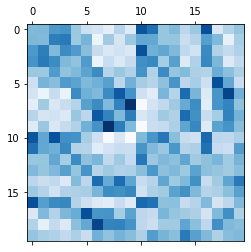

In [34]:
%matplotlib inline
a= np.load(corr_dir_adhd)
print(a.shape)
fig, ax = plt.subplots()
ax.matshow(a[200,:,:], cmap=plt.cm.Blues)

## Sample control corr table

(1757, 20, 20)


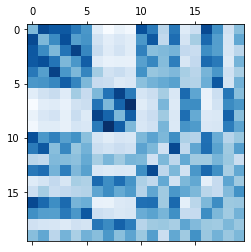

In [21]:
a= np.load(corr_dir_control)
print(a.shape)
fig, ax = plt.subplots()
ax.matshow(a[200,:,:], cmap=plt.cm.Blues)